In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base = "/content/drive/MyDrive/Colab_Notebooks/ds_Geeth_Sahith"

Mounted at /content/drive


In [ ]:
import os
print("Folder exists:", os.path.exists(base))

Folder exists: True


In [ ]:
import pandas as pd
import numpy as np

# Phase 1

### Loading and Cleaning

In [ ]:
fear_greed_data = pd.read_csv(f"{base}/csv_files/fear_greed_index.csv")
hist_data = pd.read_csv(f"{base}/csv_files/historical_data.csv")

In [ ]:
fear_greed_data.shape, hist_data.shape

((2644, 4), (211224, 16))

In [ ]:
print(fear_greed_data.info()); display(fear_greed_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
print(hist_data.info()); display(hist_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


**Categorical Features**

In [ ]:
fear_greed_data['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [ ]:
hist_data['Coin'].value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


In [ ]:
hist_data['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102696


In [ ]:
hist_data['Direction'].value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


In [ ]:
hist_data['Crossed'].value_counts()

,count
Crossed,
True,128403
False,82821


In [ ]:
fear_greed_data = fear_greed_data.drop(columns='timestamp')

In [ ]:
hist_data = hist_data.drop(columns=['Transaction Hash', 'Order ID', 'Trade ID', 'Crossed', 'Timestamp IST', 'Start Position', 'Direction'])

In [ ]:
fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date'])

In [ ]:
fear_greed_data['classification'] = fear_greed_data['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Extreme Greed': 'Greed',
    'Greed': 'Greed'
})

In [ ]:
fear_greed_data['classification'].value_counts()

,count
classification,
Fear,1289
Greed,959
Neutral,396


In [ ]:
fear_greed_data = fear_greed_data.drop_duplicates(subset='date', keep='first')

In [ ]:
fear_greed_data = fear_greed_data.sort_values(by='date').reset_index(drop=True)

In [ ]:
fear_greed_data.head()

,value,classification,date
0,30,Fear,2018-02-01
1,15,Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Fear,2018-02-04
4,11,Fear,2018-02-05


In [ ]:
hist_data['Timestamp'] = pd.to_datetime(hist_data['Timestamp'], unit='ms', utc=True, errors='coerce')

In [ ]:
hist_data['Timestamp'].head()

,Timestamp
0,2024-10-27 03:33:20+00:00
1,2024-10-27 03:33:20+00:00
2,2024-10-27 03:33:20+00:00
3,2024-10-27 03:33:20+00:00
4,2024-10-27 03:33:20+00:00


In [ ]:
hist_data['trade_date'] = hist_data['Timestamp'].dt.date

In [ ]:
hist_data['trade_date']

,trade_date
0,2024-10-27
1,2024-10-27
2,2024-10-27
3,2024-10-27
4,2024-10-27
...,...
211219,2025-06-15
211220,2025-06-15
211221,2025-06-15
211222,2025-06-15


In [ ]:
hist_data['Side'] = hist_data['Side'].str.strip().str.upper()
hist_data['Side'] = hist_data['Side'].replace({
    'BUY': 'long',
    'SELL': 'short'
})

In [ ]:
numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 'start_position',
                'closed_pnl', 'fee', 'trade_id', 'order_id', 'timestamp']
for col in numeric_cols:
    if col in hist_data.columns:
        hist_data[col] = pd.to_numeric(hist_data[col], errors='coerce')

In [ ]:
missing_summary = hist_data.isnull().sum()
print(missing_summary)

Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Closed PnL         0
Fee                0
Timestamp          0
trade_date         0
dtype: int64


### Feature Engineering

In [ ]:
hist_data["net_pnl"] = hist_data["Closed PnL"] - hist_data["Fee"]
hist_data["pnl_per_dollar"] = hist_data["net_pnl"] / hist_data["Size USD"]
hist_data["is_profitable"] = (hist_data["net_pnl"] > 0).astype(int)
hist_data["direction"] = hist_data["Side"].apply(lambda x: 1 if x.lower() == "long" else -1)

In [ ]:
fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date']).dt.date
hist_data['trade_date'] = pd.to_datetime(hist_data['trade_date']).dt.date

print(fear_greed_data['date'].min(), fear_greed_data['date'].max())
print(hist_data['trade_date'].min(), hist_data['trade_date'].max())


2023-03-28 2025-05-02
2023-03-28 2025-06-15


In [ ]:
overlap_start = max(fear_greed_data['date'].min(), hist_data['trade_date'].min())
overlap_end = min(fear_greed_data['date'].max(), hist_data['trade_date'].max())
print(f"Overlapping date range: {overlap_start} to {overlap_end}")

Overlapping date range: 2023-03-28 to 2025-05-02


In [ ]:
lower = hist_data['pnl_per_dollar'].quantile(0.01)
upper = hist_data['pnl_per_dollar'].quantile(0.99)
hist_data = hist_data[(hist_data['pnl_per_dollar'] >= lower) & (hist_data['pnl_per_dollar'] <= upper)]

In [ ]:
hist_data = hist_data[hist_data['Size USD'] != 0]

In [ ]:
hist_data = hist_data[hist_data['Size USD'] > 0]

In [ ]:
fear_greed_data.to_csv("/content/drive/MyDrive/Colab_Notebooks/ds_Geeth_Sahith/csv_files/cleaned_fear_greed.csv", index=False)
hist_data.to_csv("/content/drive/MyDrive/Colab_Notebooks/ds_Geeth_Sahith/csv_files/cleaned_trades.csv", index=False)

In [ ]:
print("Fear & Greed Data Summary:")
print(fear_greed_data.describe(include='all'))
print("\nTrades Data Summary:")
print(hist_data.describe(include='all'))

Fear & Greed Data Summary:
             value classification        date
count   766.000000            766         766
unique         NaN              3         766
top            NaN          Greed  2025-05-02
freq           NaN            440           1
mean     58.317232            NaN         NaN
std      16.339451            NaN         NaN
min      10.000000            NaN         NaN
25%      48.000000            NaN         NaN
50%      61.000000            NaN         NaN
75%      72.000000            NaN         NaN
max      94.000000            NaN         NaN

Trades Data Summary:
                                           Account    Coin  Execution Price  \
count                                       206957  206957    206957.000000   
unique                                          32     236              NaN   
top     0xbee1707d6b44d4d52bfe19e41f8a828645437aab    HYPE              NaN   
freq                                         39981   67881              NaN   
mean

**Merging the data**

In [ ]:
merged_data = hist_data.merge(fear_greed_data, left_on='trade_date', right_on='date', how='inner')

In [ ]:
merged_data.to_csv('/content/drive/MyDrive/Colab_Notebooks/ds_Geeth_Sahith/csv_files/final_merged_dataset.csv', index=False)

In [ ]:
print("Total Trades:", len(merged_data))
print("Matched Sentiment Count:", merged_data['classification'].notna().sum())
print("Unmatched Sentiment Count:", merged_data['classification'].isna().sum())

Total Trades: 180463
Matched Sentiment Count: 180463
Unmatched Sentiment Count: 0


In [ ]:
print("Sentiment Distribution:")
print(merged_data['classification'].value_counts())

Sentiment Distribution:
classification
Fear       132182
Greed       41324
Neutral      6957
Name: count, dtype: int64


In [ ]:
print("Trades per Date:")
print(merged_data['trade_date'].value_counts().sort_index())

Trades per Date:
trade_date
2023-03-28         3
2023-11-14      1045
2024-03-09      6901
2024-07-03      6957
2024-10-27     33375
2025-02-19    132182
Name: count, dtype: int64


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180463 entries, 0 to 180462
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Account          180463 non-null  object             
 1   Coin             180463 non-null  object             
 2   Execution Price  180463 non-null  float64            
 3   Size Tokens      180463 non-null  float64            
 4   Size USD         180463 non-null  float64            
 5   Side             180463 non-null  object             
 6   Closed PnL       180463 non-null  float64            
 7   Fee              180463 non-null  float64            
 8   Timestamp        180463 non-null  datetime64[ns, UTC]
 9   trade_date       180463 non-null  object             
 10  net_pnl          180463 non-null  float64            
 11  pnl_per_dollar   180463 non-null  float64            
 12  is_profitable    180463 non-null  int64              
 13 

In [ ]:
print("Missing Data Summary:")
print(merged_data.isna().sum())

Missing Data Summary:
Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Closed PnL         0
Fee                0
Timestamp          0
trade_date         0
net_pnl            0
pnl_per_dollar     0
is_profitable      0
direction          0
value              0
classification     0
date               0
dtype: int64


# Phase 2

### Exploratory Data Analysis (EDA)

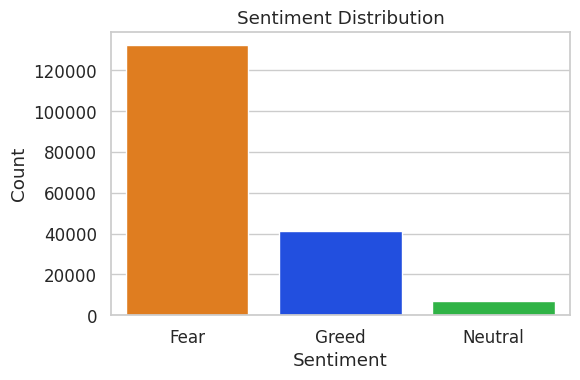

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

plt.figure(figsize=(6, 4))
sns.countplot(x='classification', data=merged_data, order=merged_data['classification'].value_counts().index, hue='classification', palette='bright')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

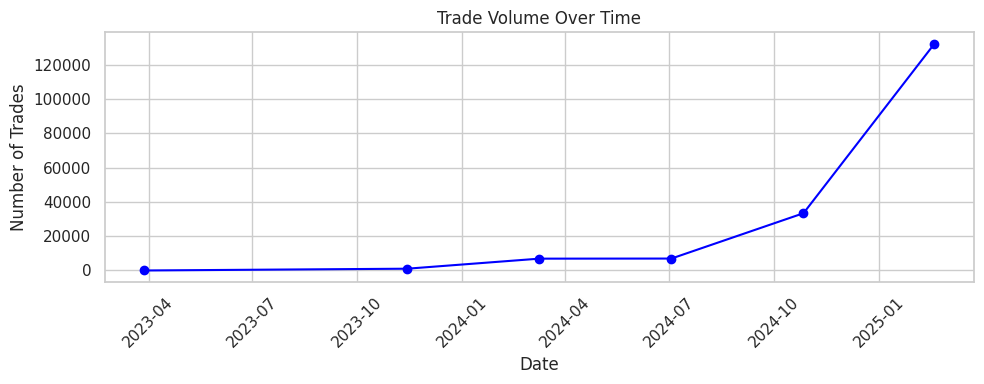

In [ ]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
daily_counts = merged_data.groupby(merged_data['date'].dt.date).size()

plt.figure(figsize=(10, 4))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='blue')
plt.title("Trade Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

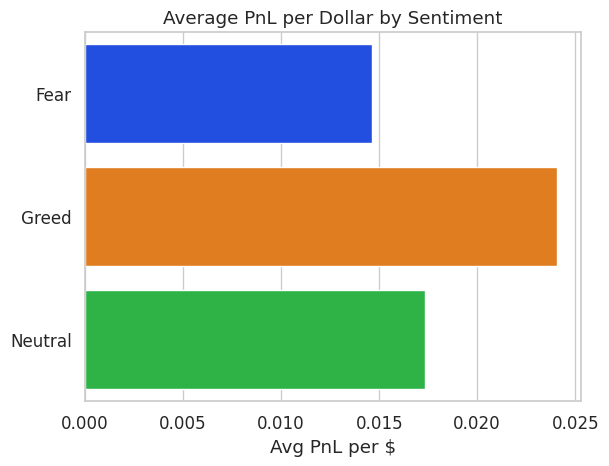

In [ ]:
avg_pnl = merged_data.groupby('classification')['pnl_per_dollar'].mean().reset_index()
sns.barplot(data=avg_pnl, x='pnl_per_dollar', y='classification', hue='classification', palette='bright')
plt.title('Average PnL per Dollar by Sentiment')
plt.xlabel('Avg PnL per $')
plt.ylabel('')
plt.show()

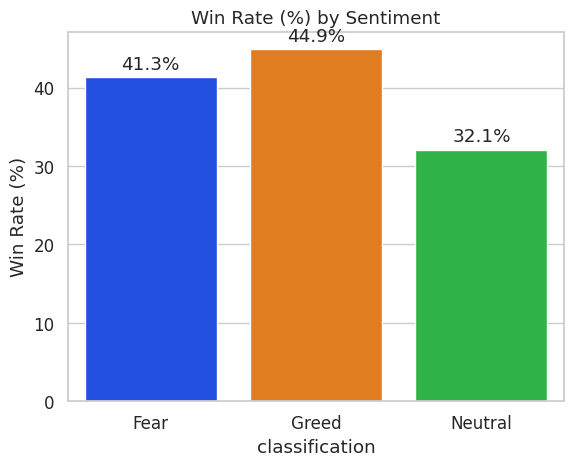

In [ ]:
win_rate = merged_data.groupby('classification')['is_profitable'].mean().reset_index()
win_rate['is_profitable'] *= 100
sns.barplot(data=win_rate, x='classification', y='is_profitable',hue='classification', palette='bright')
plt.title('Win Rate (%) by Sentiment')
plt.ylabel('Win Rate (%)')
for i, v in enumerate(win_rate['is_profitable']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.show()


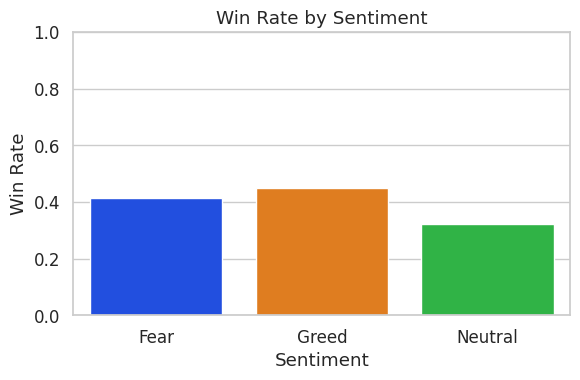

In [ ]:
win_rates = merged_data.groupby("classification")["is_profitable"].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=win_rates, x="classification", y="is_profitable", hue="classification", dodge=False, palette="bright")
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

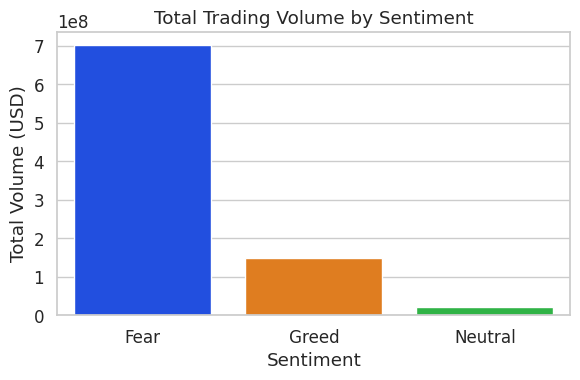

In [ ]:
volume_by_sentiment = merged_data.groupby("classification")["Size USD"].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=volume_by_sentiment, x="classification", y="Size USD", hue="classification", dodge=False, palette="bright")
plt.title("Total Trading Volume by Sentiment")
plt.ylabel("Total Volume (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

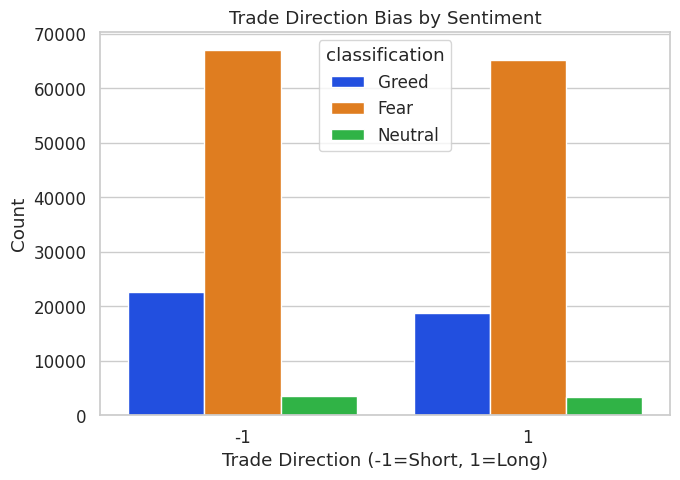

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=merged_data, x="direction", hue="classification", palette="bright")
plt.title("Trade Direction Bias by Sentiment")
plt.xlabel("Trade Direction (-1=Short, 1=Long)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

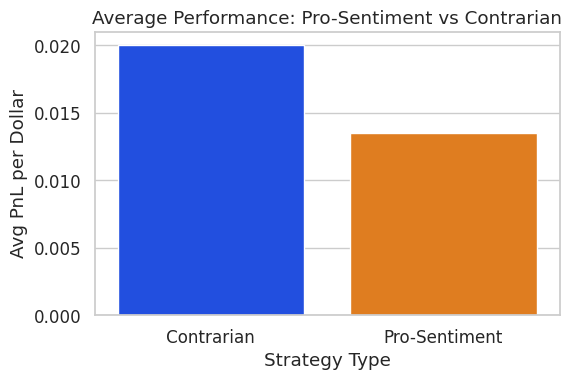

In [ ]:
def label_strategy(row):
    if (row["classification"] == "Greed" and row["direction"] == 1) or (row["classification"] == "Fear" and row["direction"] == -1):
        return "Pro-Sentiment"
    else:
        return "Contrarian"

merged_data["trade_strategy"] = merged_data.apply(label_strategy, axis=1)

strategy_perf = merged_data.groupby("trade_strategy")["pnl_per_dollar"].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=strategy_perf, x="trade_strategy", y="pnl_per_dollar", hue="trade_strategy", dodge=False, palette="bright")
plt.title("Average Performance: Pro-Sentiment vs Contrarian")
plt.ylabel("Avg PnL per Dollar")
plt.xlabel("Strategy Type")
plt.tight_layout()
plt.show()

In [ ]:
top_performers = (
    merged_data.groupby(['classification', 'Account'])['pnl_per_dollar']
      .mean()
      .reset_index()
      .sort_values(['classification', 'pnl_per_dollar'], ascending=[True, False])
)

top_n = 5  # top N accounts per sentiment
top_performers_each = top_performers.groupby('classification').head(top_n)
print("Top Performers in Each Sentiment:")
print(top_performers_each)

Top Performers in Each Sentiment:
   classification                                     Account  pnl_per_dollar
24           Fear  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0        0.198200
16           Fear  0x72c6a4624e1dffa724e6d00d64ceae698af892a0        0.122368
9            Fear  0x430f09841d65beb3f27765503d0f850b8bce7713        0.090798
5            Fear  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891        0.052635
0            Fear  0x083384f897ee0f19899168e3b1bec365f52a9012        0.040847
37          Greed  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891        0.152487
54          Greed  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0        0.134236
46          Greed  0x72743ae2822edd658c0c50608fd7c5c501b2afbd        0.113564
38          Greed  0x39cef799f8b69da1995852eea189df24eb5cae3c        0.083628
55          Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed        0.049692
62        Neutral  0x430f09841d65beb3f27765503d0f850b8bce7713        0.340808
67        Neutral  0xb1231a4a2

In [ ]:
import pprint
sentiment_counts = merged_data.groupby('Account')['classification'].nunique()
consistent_accounts = sentiment_counts[sentiment_counts == 2].index
print(f"\nAccounts trading in both sentiments ({len(consistent_accounts)} accounts):")
pprint.pprint(consistent_accounts.tolist())


Accounts trading in both sentiments (20 accounts):
['0x083384f897ee0f19899168e3b1bec365f52a9012',
 '0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd',
 '0x28736f43f1e871e6aa8b1148d38d4994275d72c4',
 '0x2c229d22b100a7beb69122eed721cee9b24011dd',
 '0x39cef799f8b69da1995852eea189df24eb5cae3c',
 '0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6',
 '0x420ab45e0bd8863569a5efbb9c05d91f40624641',
 '0x47add9a56df66b524d5e2c1993a43cde53b6ed85',
 '0x4acb90e786d897ecffb614dc822eb231b4ffb9f4',
 '0x513b8629fe877bb581bf244e326a047b249c4ff1',
 '0x72743ae2822edd658c0c50608fd7c5c501b2afbd',
 '0x72c6a4624e1dffa724e6d00d64ceae698af892a0',
 '0x8170715b3b381dffb7062c0298972d4727a0a63b',
 '0x8381e6d82f1affd39a336e143e081ef7620a3b7f',
 '0x92f17e8d81a944691c10e753af1b1baae1a2cd0d',
 '0xa0feb3725a9335f49874d7cd8eaad6be45b27416',
 '0xae5eacaf9c6b9111fd53034a602c192a04e082ed',
 '0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb',
 '0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3',
 '0xbee1707d6b44d4d52bfe19e41f8a828645437aab']


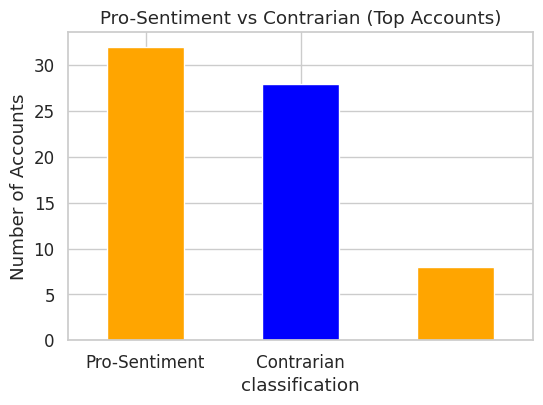

In [ ]:
threshold = merged_data['pnl_per_dollar'].quantile(0.75)
successful_accounts = merged_data[merged_data['pnl_per_dollar'] >= threshold]['Account'].unique()

behavior_patterns = (
    merged_data[merged_data['Account'].isin(successful_accounts)]
    .groupby(['Account', 'classification'])['pnl_per_dollar']
    .mean()
    .reset_index()
)
plt.figure(figsize=(6,4))
behavior_counts = (
    merged_data[merged_data['Account'].isin(successful_accounts)]
    .groupby('classification')['Account']
    .nunique()
)
behavior_counts.plot(kind='bar', color=['orange', 'blue'])
plt.title('Pro-Sentiment vs Contrarian (Top Accounts)')
plt.ylabel('Number of Accounts')
plt.xticks([0, 1], ['Pro-Sentiment', 'Contrarian'], rotation=0)
plt.show()

In [ ]:
output_dir = "/content/drive/MyDrive/Colab_Notebooks/ds_Geeth_Sahith/outputs"
summary_stats = merged_data.groupby("classification")["pnl_per_dollar"].agg(
    count="count",
    mean="mean",
    std="std",
    min="min",
    max="max"
).reset_index()

In [ ]:
summary_stats.to_csv(f"{output_dir}/summary_stats_by_sentiment.csv", index=False)